In [ ]:
# Load the dataset into a Pandas DataFrame.
# Perform exploratory data analysis (EDA):
# Check for missing values, data types, and summary statistics.
# Identify potential outliers in numerical columns.
# Analyze the distribution of categorical variables.

In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('heart_disease.csv')
df.columns.tolist()


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

Missing Values Check:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


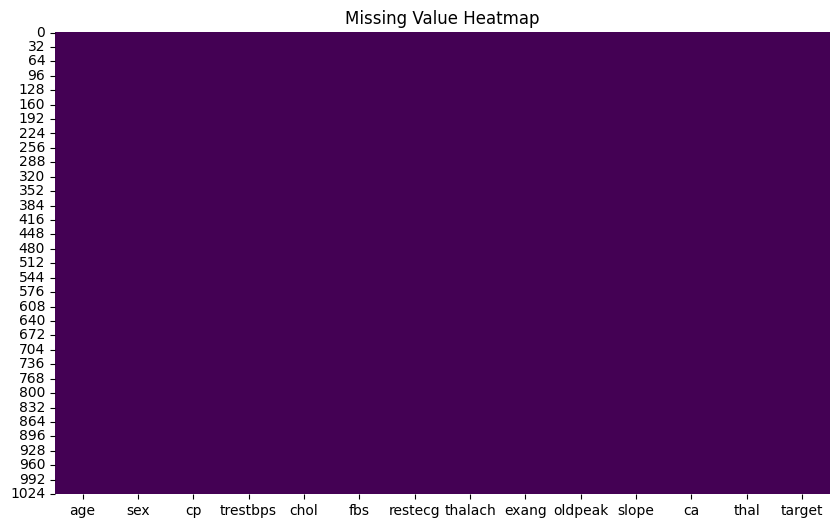

In [4]:
print("Missing Values Check:")
print(df.isnull().sum())

# Optional: Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [5]:
print("Data Types:")
print(df.dtypes)

Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


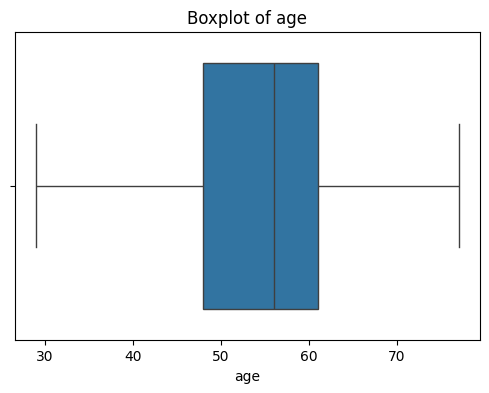

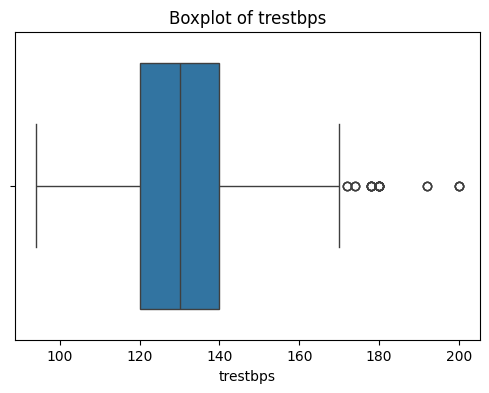

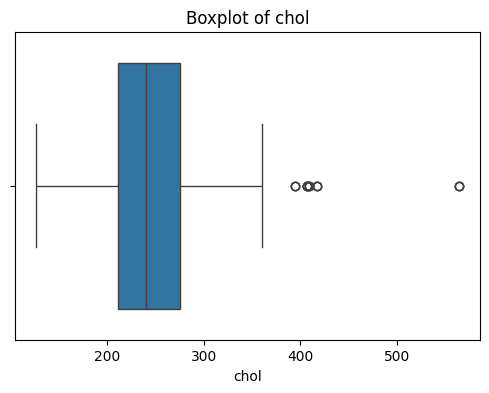

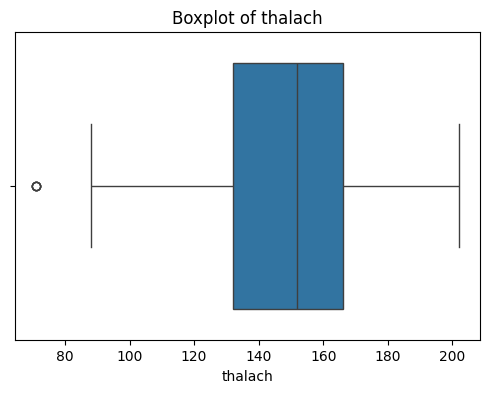

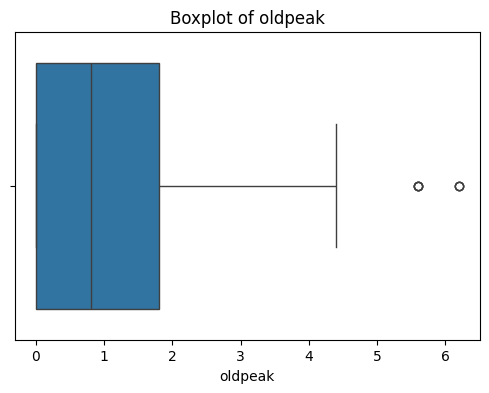

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers


for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers detected in '{col}': {len(outliers)} rows")


Outliers detected in 'age': 0 rows
Outliers detected in 'trestbps': 30 rows
Outliers detected in 'chol': 16 rows
Outliers detected in 'thalach': 4 rows
Outliers detected in 'oldpeak': 7 rows



 Distribution for 'sex':
sex
1    713
0    312
Name: count, dtype: int64

 Distribution for 'cp':
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

 Distribution for 'fbs':
fbs
0    872
1    153
Name: count, dtype: int64

 Distribution for 'restecg':
restecg
1    513
0    497
2     15
Name: count, dtype: int64

 Distribution for 'exang':
exang
0    680
1    345
Name: count, dtype: int64

 Distribution for 'slope':
slope
1    482
2    469
0     74
Name: count, dtype: int64

 Distribution for 'ca':
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

 Distribution for 'thal':
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


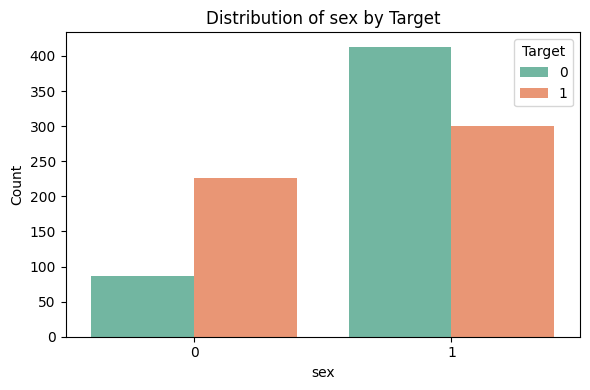

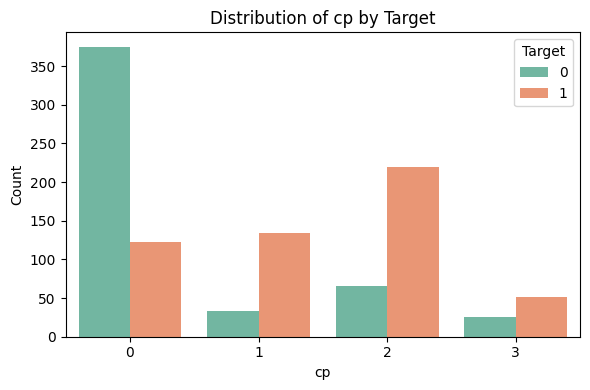

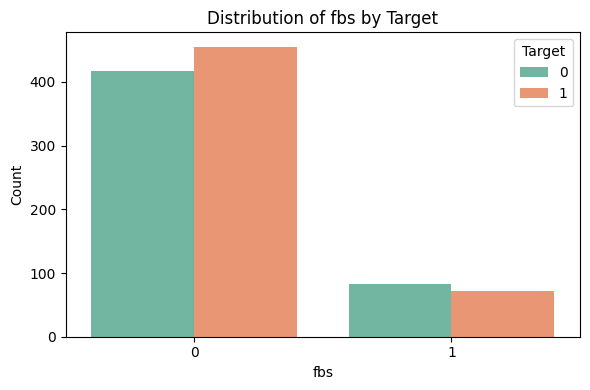

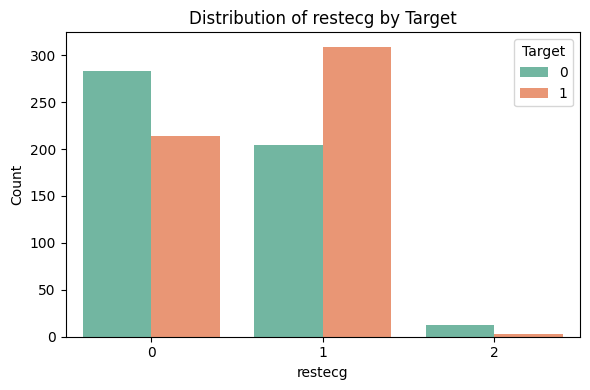

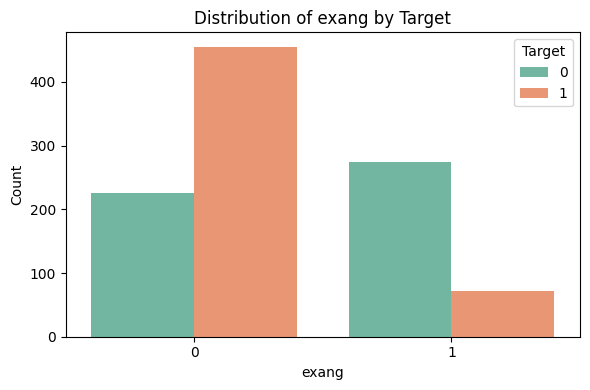

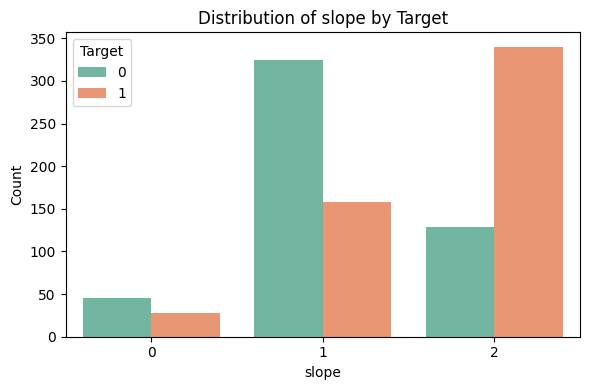

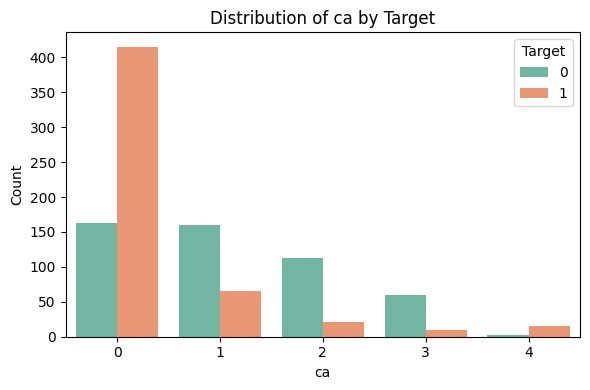

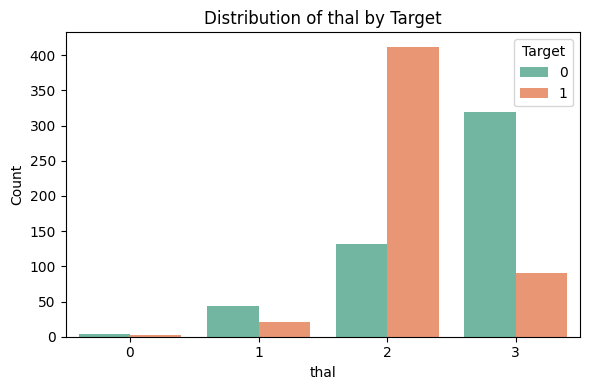

In [11]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    print(f"\n Distribution for '{col}':")
    print(df[col].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='target', palette='Set2')
    plt.title(f"Distribution of {col} by Target")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.tight_layout()
    plt.show()


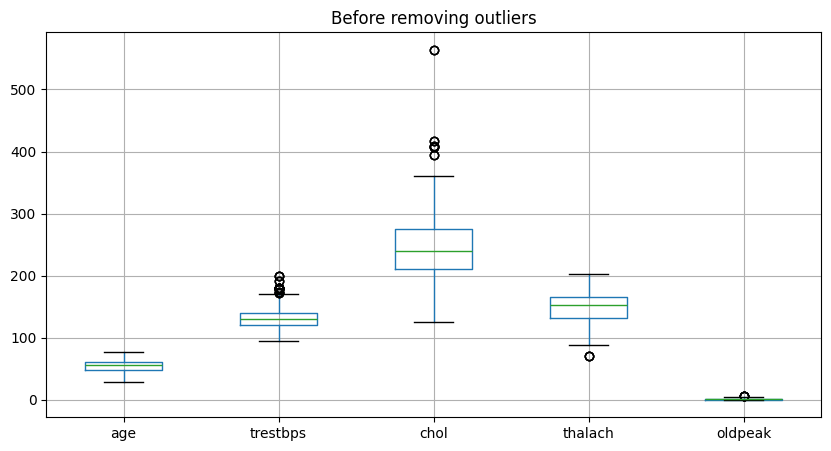

In [29]:
from scipy import stats

#plotting num_cols before removing outliers
plt.figure(figsize=(10, 5))
df[num_cols].boxplot()
plt.title("Before removing outliers")
plt.show()

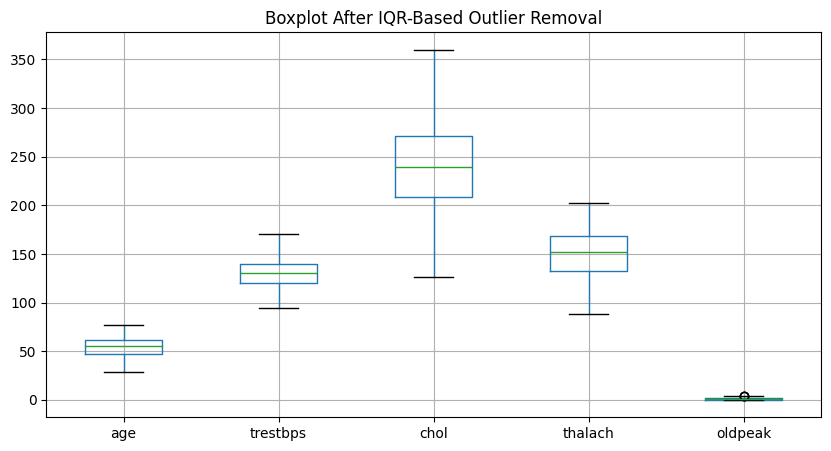

In [33]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# Visualize
plt.figure(figsize=(10, 5))
df_clean[num_cols].boxplot()
plt.title("Boxplot After IQR-Based Outlier Removal")
plt.show()

In [ ]:

one_hot_encoded = pd.get_dummies(df_clean, columns=['cp', 'restecg', 'thal'], drop_first=True)
one_hot_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,0,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,0,False,False,False,True,False,False,True,False


In [37]:

df_clean['sex_bin'] = df_clean['sex'].astype(int)
df_clean['fbs_bin'] = df_clean['fbs'].astype(int)

df_clean[['sex_bin', 'fbs_bin']].head()


,sex_bin,fbs_bin
0,1,0
1,1,1
2,1,0
3,1,0
4,0,1


In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


features_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()

df_scaled_minmax[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

print("✅ Features scaled using MinMaxScaler (range 0–1)")
print(df_scaled_minmax[features_to_scale].describe())


✅ Features scaled using MinMaxScaler (range 0–1)
          trestbps         chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.000000  1025.000000
mean      0.354827     0.273973     0.596291     0.172825
std       0.165252     0.117791     0.175616     0.189525
min       0.000000     0.000000     0.000000     0.000000
25%       0.245283     0.194064     0.465649     0.000000
50%       0.339623     0.260274     0.618321     0.129032
75%       0.433962     0.340183     0.725191     0.290323
max       1.000000     1.000000     1.000000     1.000000


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

one_hot_encoded = df.copy()

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


scaled_df_reg = one_hot_encoded.copy()
scaler_reg = StandardScaler()
scaled_df_reg[num_cols] = scaler_reg.fit_transform(scaled_df_reg[num_cols])

y_reg = scaled_df_reg['chol']
X_reg = scaled_df_reg.drop('chol', axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

print("X_train_reg shape:", X_train_reg.shape)
print("y_train_reg shape:", y_train_reg.shape)



scaled_df_cls = one_hot_encoded.copy()
scaler_cls = StandardScaler()
scaled_df_cls[num_cols] = scaler_cls.fit_transform(scaled_df_cls[num_cols])

y_cls = scaled_df_cls['target']
X_cls = scaled_df_cls.drop('target', axis=1)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42)

print("X_train_cls shape:", X_train_cls.shape)
print("y_train_cls shape:", y_train_cls.shape)

X_train_reg shape: (820, 13)
y_train_reg shape: (820,)
X_train_cls shape: (820, 13)
y_train_cls shape: (820,)


In [46]:
#creating the Regression models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg_models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Random Forest Regressor": RandomForestRegressor()
}

reg_results = []

for name, reg_model in reg_models.items():
    reg_model.fit(X_reg, y_reg)
    y_reg_pred = reg_model.predict(X_test_reg)
    
    mae = mean_absolute_error(y_test_reg, y_reg_pred)
    mse = mean_squared_error(y_test_reg, y_reg_pred)
    r2 = r2_score(y_test_reg, y_reg_pred)

    reg_results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    })

pd.DataFrame(reg_results)

,Model,MAE,MSE,R2
0,Linear Regression,0.780966,1.149865,0.106505
1,Support Vector Regressor,0.557247,0.849521,0.339885
2,Random Forest Regressor,0.030547,0.002419,0.998121


In [47]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cls_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "KNNcls": KNeighborsClassifier()
}

cls_results = []

for name, cls_model in cls_models.items():
    cls_model.fit(X_cls, y_cls)
    y_cls_pred = cls_model.predict(X_test_cls)
    
    accuracy = accuracy_score(y_test_cls, y_cls_pred)
    precision = precision_score(y_test_cls, y_cls_pred)
    recall = recall_score(y_test_cls, y_cls_pred)
    f1 = f1_score(y_test_cls, y_cls_pred)

    cls_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
    
pd.DataFrame(cls_results)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.809756,0.762295,0.902913,0.826667
1,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
2,KNNcls,1.000000,1.000000,1.000000,1.000000


In [48]:

cls_results_df = pd.DataFrame(cls_results)
print("Classification Results:")
display(cls_results_df)

best_cls_model = cls_results_df.loc[cls_results_df['F1-Score'].idxmax()]
print(f"Best Classification Model: {best_cls_model['Model']} (F1-Score: {best_cls_model['F1-Score']:.3f})")

reg_results_df = pd.DataFrame(reg_results)
print("Regression Results:")
display(reg_results_df)


best_reg_model = reg_results_df.loc[reg_results_df['R2'].idxmax()]
print(f"Best Regression Model: {best_reg_model['Model']} (R2: {best_reg_model['R2']:.3f})")

Classification Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.809756,0.762295,0.902913,0.826667
1,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
2,KNNcls,1.000000,1.000000,1.000000,1.000000


Best Classification Model: Random Forest Classifier (F1-Score: 1.000)
Regression Results:


,Model,MAE,MSE,R2
0,Linear Regression,0.780966,1.149865,0.106505
1,Support Vector Regressor,0.557247,0.849521,0.339885
2,Random Forest Regressor,0.030547,0.002419,0.998121


Best Regression Model: Random Forest Regressor (R2: 0.998)


In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        # Ensure numeric types
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).flatten()

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return np.dot(X, self.weights) + self.bias

# 💥 Make sure your training data is CLEAN
X_train = np.array(X_train_reg, dtype=np.float64)
y_train = np.array(y_train_reg, dtype=np.float64).flatten()
X_test = np.array(X_test_reg, dtype=np.float64)
y_test = np.array(y_test_reg, dtype=np.float64).flatten()

# 💪 Train your custom model
model = CustomLinearRegression(lr=0.01, epochs=1000)
model.fit(X_train, y_train)

# 🔮 Predict and Evaluate
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(" R2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 1.2022038892027942
 R2 Score: 0.06583596323569818
